In [81]:
import AlgPoly as ap
import numpy as np
import PolyNN
import matplotlib.pyplot as plt

We will train the following (very simple) polynomial network. This will amount to do a polynomial regression.

In [82]:
net = PolyNN.PolyNN([1,1],PolyNN.identity,[3])

net will learn to be the following polynomial P :

In [83]:
#P=X^3 + 2X^2 - 3X +1
P = ap.Polynomial({():1, (0,):-3 , (0,0) : 2, (0,0,0) : 1})

Creating a training data : 

In [84]:
training_data = []
for i in range(100000):
    x =  10*np.random.rand(1)
    y = P.raw_evaluate(x)
    #we add some random errors on the output
    y += np.random.normal(0,1)
    training_data.append((x,y))

If we were to train net with a constant learning rate eta we would diverge and trigger overflow!

This is handled by the option normalize, which ensures that the learning steps are all about the same size. This option prevents overflow but slows down the learning process.

In [85]:
for (x,y) in training_data:
    net.steplearning(x,y,0.1,normalize=True)

Let's plot our training data (blue points) and see what our network predicts now that it is trained (red curve)

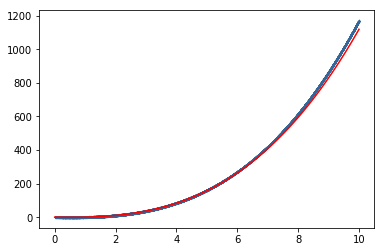

In [86]:
training_x = [x for (x,y) in training_data]
training_y = [y for (x,y) in training_data]
t = np.linspace(0,10,1000)
network_predictions = [net.feedForward(np.array([x])) for x in t]
plt.scatter(training_x,training_y,s=0.1,c=(0.2,0.4,0.6,0.5)) #a scatter view of our training set
plt.plot(t,network_predictions,'r')
plt.show()

This isn't perfectly accurate, but we can improve the net with a second training session :

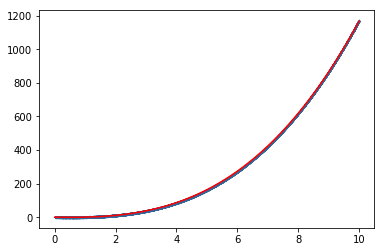

In [87]:
for (x,y) in training_data:
    net.steplearning(x,y,0.1,normalize=True)
    
t = np.linspace(0,10,1000)
network_predictions = [net.feedForward(np.array([x])) for x in t]
plt.scatter(training_x,training_y,s=0.1,c=(0.2,0.4,0.6,0.5)) #a scatter view of our training set
plt.plot(t,network_predictions,'r')
plt.show()